In [1]:
import torch.nn as nn
import torch
from model import Unet
from preprocess import get_train_test_data
from helper import pixel_accuracy
from train import train_step
from plotting import plot_image, display_image

In [2]:
train_loader, test_loader = get_train_test_data(False)

## First Model
* the unet model is simple without softmax in it
* y is distance value where each channel is the distance of the value of the pixel from a class value
* softmax is not added in train step

In [3]:
model_0 = Unet(in_channels=3, out_channels=6)
#criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=1e-4)

In [4]:
train_step(num_epochs=5, model=model_0, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer,
           criterion=criterion, pixel_accuracy=pixel_accuracy, accuracy_use_softmax=False, one_hot=False)

Epoch [1/5], Train Loss: 2.5973, Train Acc: 0.2638, Val Loss: 2.6951, Val Acc: 0.0744
Epoch [2/5], Train Loss: 2.4804, Train Acc: 0.4563, Val Loss: 2.6597, Val Acc: 0.5477
Epoch [3/5], Train Loss: 2.4396, Train Acc: 0.5500, Val Loss: 2.5991, Val Acc: 0.5798
Epoch [4/5], Train Loss: 2.4219, Train Acc: 0.5623, Val Loss: 2.5755, Val Acc: 0.5785
Epoch [5/5], Train Loss: 2.4174, Train Acc: 0.5726, Val Loss: 2.5716, Val Acc: 0.5792


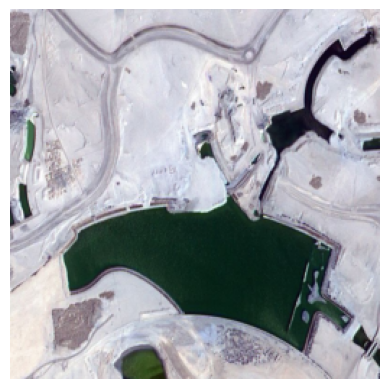

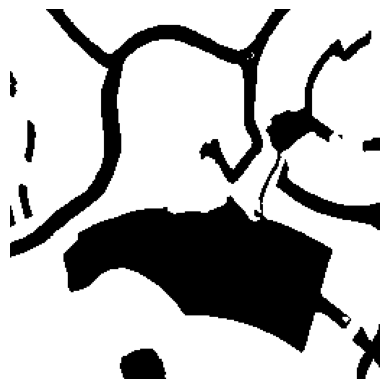

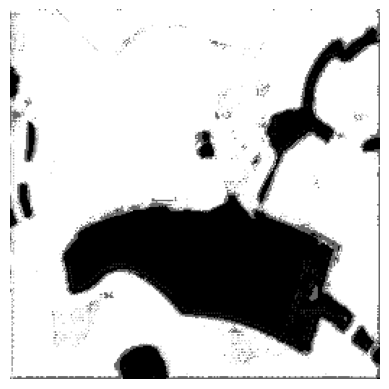

In [5]:
with torch.no_grad():
    for image, label in test_loader:
        image = image[:1, :, :, :]
        label = label[:1, :, :, :]

        break

    output = model_0(image)
    output = torch.argmax(output, dim=1)
    label = torch.argmax(label, dim=1)
    # output = output/6
    # label = label/6

    output = display_image(output)
    label = display_image(label)

    plot_image(image.squeeze(dim=0))
    plot_image(label)
    plot_image(output)

## Second Model
* the unet model is simple without softmax in it
* y is one hot vector where each channel value is one if the pixel belongs that class and 0 otherwise 
* softmax is not added in train step

In [2]:
train_loader, test_loader = get_train_test_data(True)

In [3]:
model_1 = Unet(in_channels=3, out_channels=6)
# criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=1e-4)

In [4]:
train_step(num_epochs=5, model=model_1, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer,
           criterion=criterion, pixel_accuracy=pixel_accuracy, accuracy_use_softmax=True, one_hot=True)

Epoch [1/5], Train Loss: 1.6144, Train Acc: 0.3859, Val Loss: 1.7779, Val Acc: 0.0438
Epoch [2/5], Train Loss: 1.3229, Train Acc: 0.6026, Val Loss: 1.7003, Val Acc: 0.5208
Epoch [3/5], Train Loss: 1.1796, Train Acc: 0.6728, Val Loss: 1.4981, Val Acc: 0.5724
Epoch [4/5], Train Loss: 1.1070, Train Acc: 0.6960, Val Loss: 1.3769, Val Acc: 0.5761
Epoch [5/5], Train Loss: 1.1066, Train Acc: 0.6875, Val Loss: 1.4700, Val Acc: 0.5628


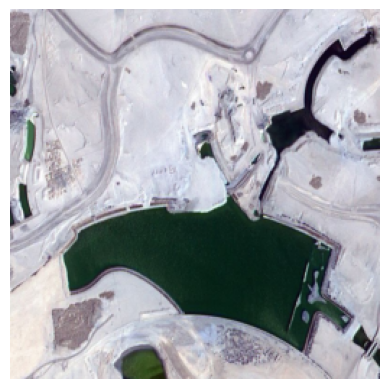

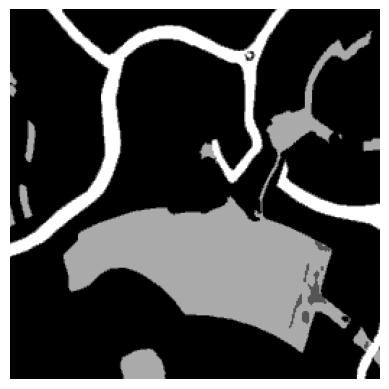

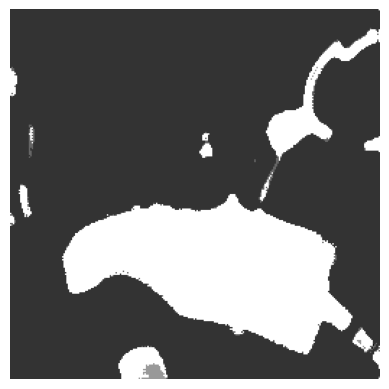

In [5]:
with torch.no_grad():
    for image, label in test_loader:
        image = image[:1, :, :, :]
        label = label[:1, :, :, :]

        break

    output = model_1(image)
    output = torch.argmax(output, dim=1)
    label = torch.argmax(label, dim=1)
    # output = output/6
    # label = label/6

    output = display_image(output)
    label = display_image(label)

    plot_image(image.squeeze(dim=0))
    plot_image(label)
    plot_image(output)

## Third Model
* the unet model is simple without softmax in it
* y is one hot vector where each channel value is one if the pixel belongs that class and 0 otherwise 
* softmax is added in train step

In [2]:
train_loader, test_loader = get_train_test_data(True)

In [3]:
model_2 = Unet(in_channels=3, out_channels=6)
# criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=1e-4)

In [4]:
train_step(num_epochs=5, model=model_2, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer,
           criterion=criterion, pixel_accuracy=pixel_accuracy, accuracy_use_softmax=False, one_hot=True, use_softmax= True)

Epoch [1/5], Train Loss: 1.7359, Train Acc: 0.3855, Val Loss: 1.7891, Val Acc: 0.0500
Epoch [2/5], Train Loss: 1.6303, Train Acc: 0.5847, Val Loss: 1.7696, Val Acc: 0.5506
Epoch [3/5], Train Loss: 1.5713, Train Acc: 0.6508, Val Loss: 1.6987, Val Acc: 0.5722
Epoch [4/5], Train Loss: 1.5381, Train Acc: 0.6718, Val Loss: 1.6167, Val Acc: 0.5702
Epoch [5/5], Train Loss: 1.5314, Train Acc: 0.6628, Val Loss: 1.6001, Val Acc: 0.5555


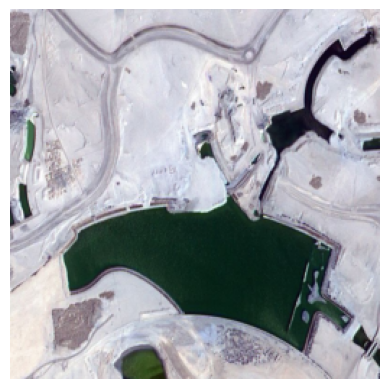

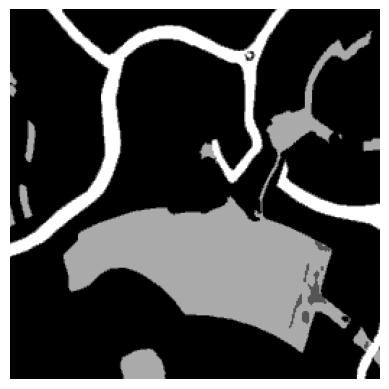

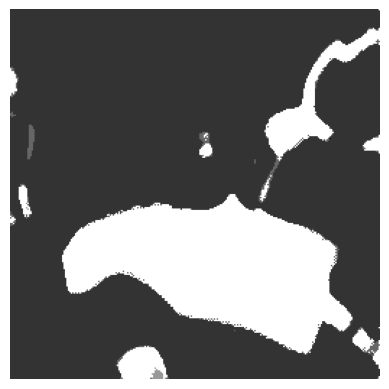

In [5]:
with torch.no_grad():
    for image, label in test_loader:
        image = image[:1, :, :, :]
        label = label[:1, :, :, :]

        break

    output = model_2(image)
    output = torch.argmax(output, dim=1)
    label = torch.argmax(label, dim=1)
    # output = output/6
    # label = label/6

    output = display_image(output)
    label = display_image(label)

    plot_image(image.squeeze(dim=0))
    plot_image(label)
    plot_image(output)

## Fourth Model
* the unet model contains softmax in it
* y is one hot vector where each channel value is one if the pixel belongs that class and 0 otherwise 
* softmax is not added in train step

In [3]:
train_loader, test_loader = get_train_test_data(True)

In [4]:
model_3 = Unet(in_channels=3, out_channels=6, use_softmax= True)
# criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), lr=1e-4)

In [5]:
train_step(num_epochs=5, model=model_3, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer,
           criterion=criterion, pixel_accuracy=pixel_accuracy, accuracy_use_softmax=False, one_hot=True, use_softmax=False)

Epoch [1/5], Train Loss: 1.7359, Train Acc: 0.3855, Val Loss: 1.7891, Val Acc: 0.0500
Epoch [2/5], Train Loss: 1.6303, Train Acc: 0.5847, Val Loss: 1.7696, Val Acc: 0.5506
Epoch [3/5], Train Loss: 1.5713, Train Acc: 0.6508, Val Loss: 1.6987, Val Acc: 0.5722
Epoch [4/5], Train Loss: 1.5381, Train Acc: 0.6718, Val Loss: 1.6167, Val Acc: 0.5702
Epoch [5/5], Train Loss: 1.5314, Train Acc: 0.6628, Val Loss: 1.6001, Val Acc: 0.5555


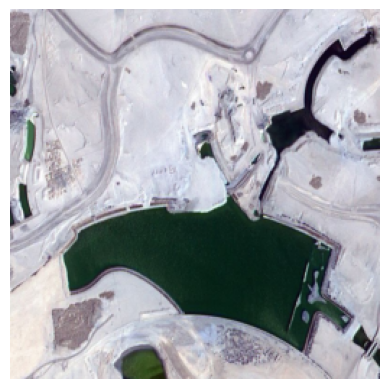

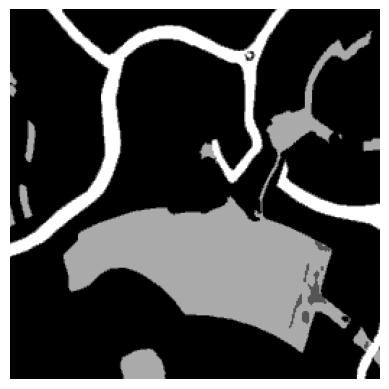

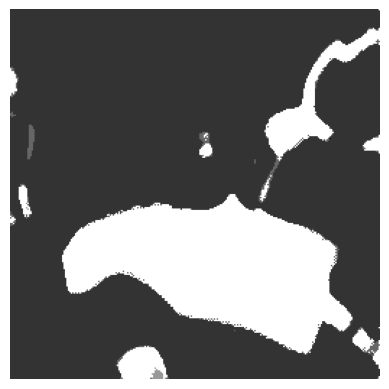

In [6]:
with torch.no_grad():
    for image, label in test_loader:
        image = image[:1, :, :, :]
        label = label[:1, :, :, :]

        break

    output = model_3(image)
    output = torch.argmax(output, dim=1)
    label = torch.argmax(label, dim=1)
    # output = output/6
    # label = label/6

    output = display_image(output)
    label = display_image(label)

    plot_image(image.squeeze(dim=0))
    plot_image(label)
    plot_image(output)

## Fifth Model
* the unet model contains softmax in it
* y is one hot vector where each channel value is one if the pixel belongs that class and 0 otherwise 
* softmax is not added in train step
* I have used binary cross entropy loss in this model

In [2]:
train_loader, test_loader = get_train_test_data(True)

In [3]:
model_4 = Unet(in_channels=3, out_channels=6, use_softmax=True)
# criterion = nn.CrossEntropyLoss(ignore_index=0)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=1e-4)

In [4]:
train_step(num_epochs=5, model=model_4, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer,
           criterion=criterion, pixel_accuracy=pixel_accuracy, accuracy_use_softmax=False, one_hot=True, use_softmax=False)

Epoch [1/5], Train Loss: 0.4123, Train Acc: 0.3853, Val Loss: 0.4478, Val Acc: 0.0439
Epoch [2/5], Train Loss: 0.3446, Train Acc: 0.5982, Val Loss: 0.4313, Val Acc: 0.5266
Epoch [3/5], Train Loss: 0.3097, Train Acc: 0.6675, Val Loss: 0.3856, Val Acc: 0.5706
Epoch [4/5], Train Loss: 0.2920, Train Acc: 0.6894, Val Loss: 0.3580, Val Acc: 0.5718
Epoch [5/5], Train Loss: 0.2929, Train Acc: 0.6808, Val Loss: 0.3852, Val Acc: 0.5609


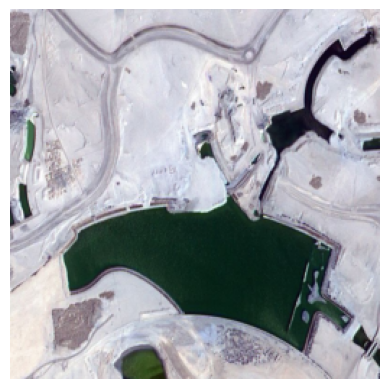

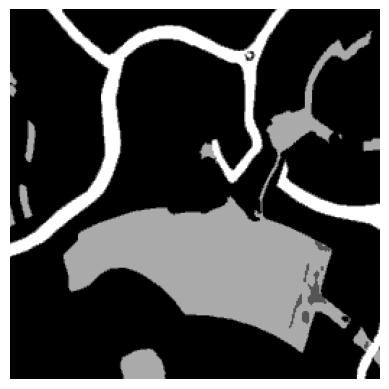

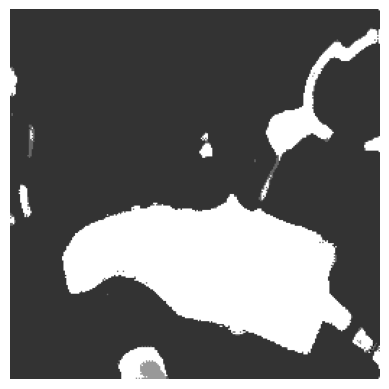

In [6]:
with torch.no_grad():
    for image, label in test_loader:
        image = image[:1, :, :, :]
        label = label[:1, :, :, :]

        break

    output = model_4(image)
    output = torch.argmax(output, dim=1)
    label = torch.argmax(label, dim=1)
    # output = output/6
    # label = label/6

    output = display_image(output)
    label = display_image(label)

    plot_image(image.squeeze(dim=0))
    plot_image(label)
    plot_image(output)